In [6]:
import networkx as nx#
import numpy as np
from matplotlib import pyplot as plt


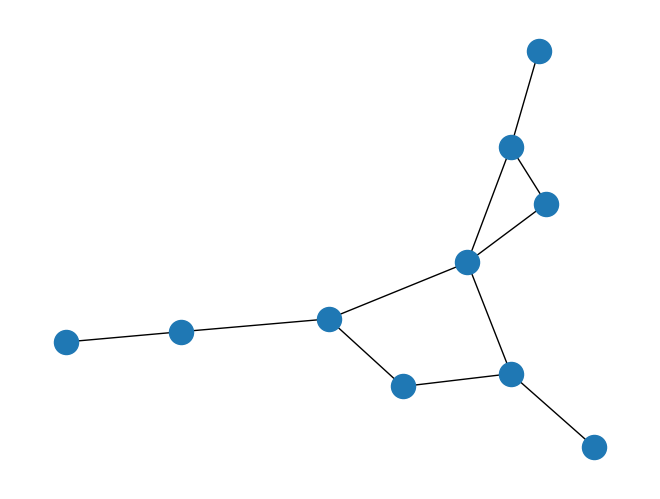

In [7]:
er_graph = nx.erdos_renyi_graph(10, 0.3)

nx.draw(er_graph)
plt.show()

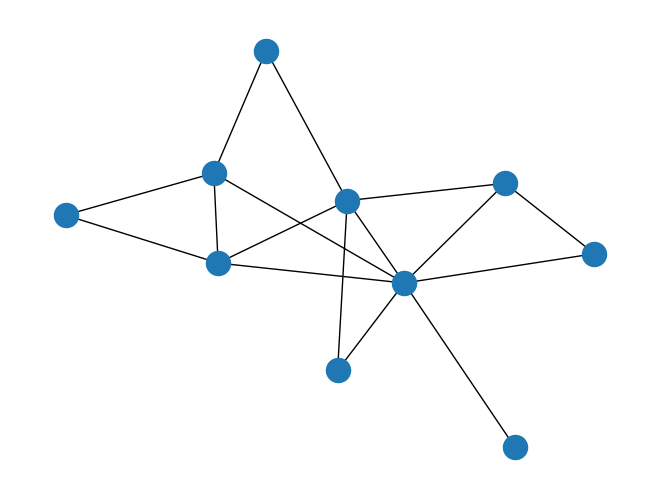

In [8]:
ba_graph = nx.barabasi_albert_graph(10, 2)

nx.draw(ba_graph)
plt.show()

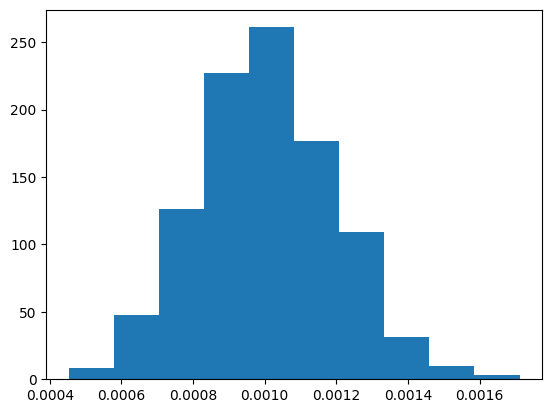

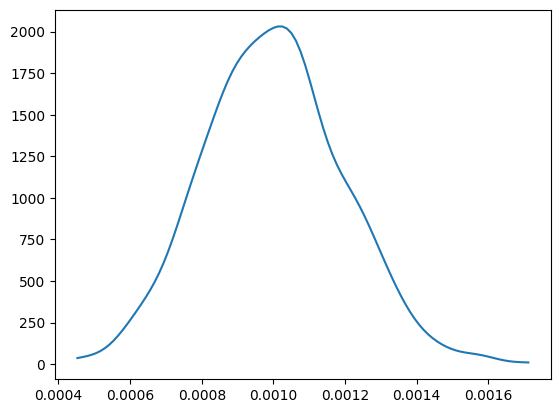

In [25]:
from scipy.stats import gaussian_kde

er_graph = nx.erdos_renyi_graph(1000, 1/50)
er_rank = np.array(list(nx.pagerank(er_graph).values()))

plt.hist(er_rank, 10)
plt.show()

kde = gaussian_kde(er_rank)
data_space = np.linspace( min(er_rank), max(er_rank), 100 )
plt.plot(data_space, kde(data_space))
plt.show()

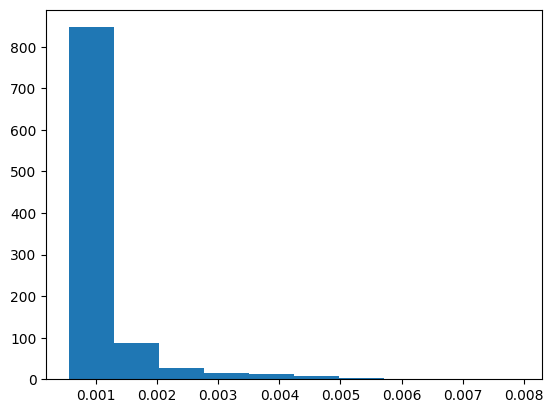

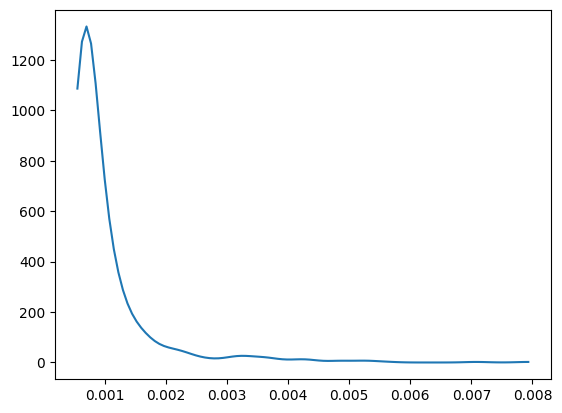

In [26]:
ba_graph = nx.barabasi_albert_graph(1000, 10)
ba_rank = np.array(list(nx.pagerank(ba_graph).values()))

plt.hist(ba_rank, 10)
plt.show()

kde = gaussian_kde(ba_rank)
data_space = np.linspace( min(ba_rank), max(ba_rank), 100 )
plt.plot(data_space, kde(data_space))
plt.show()